In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from format_io import h5_to_df

from akita_utils.seq_gens import split_concat_to_integers, split_concat_to_strings

2023-01-19 10:36:46.893863: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home1/smaruj/software/GSL/lib:/home1/smaruj/software/HTSLIB/lib
2023-01-19 10:36:46.893898: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
def average_over_targets(dataframe, stat, mouse=True, model=1):
    
    num_targets = 6
    if not mouse:
        num_targets = 5
    
    collist = [stat + f"_h{int(mouse)}_m{model}_t{i}" for i in range(num_targets)]
    
    dataframe[f"{stat}_average"] = dataframe[collist].mean(axis=1)
    
    return dataframe

In [3]:
path = "./100VS100strong/scd.h5"
scd_stats=["SCD"]

In [4]:
df = h5_to_df(path, scd_stats, drop_duplicates_key=None)

In [5]:
df = average_over_targets(df, "SCD")

In [6]:
df

,SCD_h1_m1_t0,SCD_h1_m1_t1,SCD_h1_m1_t2,SCD_h1_m1_t3,SCD_h1_m1_t4,SCD_h1_m1_t5,background_index,chrom,end,flank_bp,genomic_SCD,orientation,spacer_bp,start,strand,SCD_average
0,70.68750,77.75000,76.4375,71.31250,76.50000,63.62500,1,"chr9,chr9","15685402,15685402",25,"54.0,54.0",>>,65,"15685383,15685383","+,+",72.75000
1,45.90625,44.40625,47.6250,45.96875,48.59375,44.71875,1,"chr9,chr12","15685402,35192380",25,"54.0,53.78125",>>,65,"15685383,35192361","+,+",46.21875
2,71.62500,78.87500,76.6250,71.62500,77.06250,64.00000,1,"chr9,chr2","15685402,48886271",25,"54.0,53.6875",>>,65,"15685383,48886252","+,-",73.31250
3,80.31250,89.75000,92.1250,86.31250,90.00000,74.18750,1,"chr9,chr12","15685402,35192378",25,"54.0,53.65625",>>,65,"15685383,35192359","+,-",85.43750
4,65.06250,70.62500,67.4375,62.96875,68.75000,57.93750,1,"chr9,chr8","15685402,102781131",25,"54.0,53.5",>>,65,"15685383,102781112","+,-",65.50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,85.06250,101.31250,98.1250,92.81250,97.31250,78.81250,3,"chr2,chr2","37815879,17415581",25,"42.1875,42.34375",>>,65,"37815860,17415562","+,-",92.25000
29996,76.50000,90.75000,87.0625,82.18750,87.06250,70.81250,3,"chr2,chr7","37815879,49121503",25,"42.1875,42.3125",>>,65,"37815860,49121484","+,-",82.37500
29997,50.78125,52.09375,59.6250,61.59375,58.68750,51.68750,3,"chr2,chr18","37815879,16211911",25,"42.1875,42.3125",>>,65,"37815860,16211892","+,+",55.75000
29998,89.00000,106.56250,107.1250,101.37500,104.31250,84.31250,3,"chr2,chr8","37815879,26184387",25,"42.1875,42.21875",>>,65,"37815860,26184368","+,+",98.75000


In [7]:
# I identify the motifs by their sites' start coordinates

df["core_start"] = df["start"].apply(lambda x: x.split(",")[0])
df["flank_start"] = df["start"].apply(lambda x: x.split(",")[1])

In [8]:
df

,SCD_h1_m1_t0,SCD_h1_m1_t1,SCD_h1_m1_t2,SCD_h1_m1_t3,SCD_h1_m1_t4,SCD_h1_m1_t5,background_index,chrom,end,flank_bp,genomic_SCD,orientation,spacer_bp,start,strand,SCD_average,core_start,flank_start
0,70.68750,77.75000,76.4375,71.31250,76.50000,63.62500,1,"chr9,chr9","15685402,15685402",25,"54.0,54.0",>>,65,"15685383,15685383","+,+",72.75000,15685383,15685383
1,45.90625,44.40625,47.6250,45.96875,48.59375,44.71875,1,"chr9,chr12","15685402,35192380",25,"54.0,53.78125",>>,65,"15685383,35192361","+,+",46.21875,15685383,35192361
2,71.62500,78.87500,76.6250,71.62500,77.06250,64.00000,1,"chr9,chr2","15685402,48886271",25,"54.0,53.6875",>>,65,"15685383,48886252","+,-",73.31250,15685383,48886252
3,80.31250,89.75000,92.1250,86.31250,90.00000,74.18750,1,"chr9,chr12","15685402,35192378",25,"54.0,53.65625",>>,65,"15685383,35192359","+,-",85.43750,15685383,35192359
4,65.06250,70.62500,67.4375,62.96875,68.75000,57.93750,1,"chr9,chr8","15685402,102781131",25,"54.0,53.5",>>,65,"15685383,102781112","+,-",65.50000,15685383,102781112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,85.06250,101.31250,98.1250,92.81250,97.31250,78.81250,3,"chr2,chr2","37815879,17415581",25,"42.1875,42.34375",>>,65,"37815860,17415562","+,-",92.25000,37815860,17415562
29996,76.50000,90.75000,87.0625,82.18750,87.06250,70.81250,3,"chr2,chr7","37815879,49121503",25,"42.1875,42.3125",>>,65,"37815860,49121484","+,-",82.37500,37815860,49121484
29997,50.78125,52.09375,59.6250,61.59375,58.68750,51.68750,3,"chr2,chr18","37815879,16211911",25,"42.1875,42.3125",>>,65,"37815860,16211892","+,+",55.75000,37815860,16211892
29998,89.00000,106.56250,107.1250,101.37500,104.31250,84.31250,3,"chr2,chr8","37815879,26184387",25,"42.1875,42.21875",>>,65,"37815860,26184368","+,+",98.75000,37815860,26184368


In [9]:
df_grouped = df.groupby(["core_start", "flank_start"]).agg({"SCD_average": "mean"}).reset_index()

In [10]:
df_grouped

,core_start,flank_start,SCD_average
0,100882571,100882571,74.68750
1,100882571,101261721,77.06250
2,100882571,101905952,62.59375
3,100882571,102510621,54.15625
4,100882571,102781112,64.31250
...,...,...,...
9995,9711102,89765679,93.31250
9996,9711102,91797706,74.93750
9997,9711102,92303369,66.93750
9998,9711102,96671788,62.28125


# order of rows and columns - by the inserion SCD of matching core-flank pairs

In [11]:
native_SCDs = df_grouped[df_grouped["core_start"] == df_grouped["flank_start"]]

In [12]:
native_SCDs

,core_start,flank_start,SCD_average
0,100882571,100882571,74.68750
101,101261721,101261721,87.56250
202,101905952,101905952,60.46875
303,102510621,102510621,64.00000
404,102781112,102781112,68.00000
...,...,...,...
9595,89765679,89765679,83.68750
9696,91797706,91797706,56.00000
9797,92303369,92303369,70.87500
9898,96671788,96671788,56.62500


In [13]:
sorted_native_SCDs = native_SCDs.sort_values(by="SCD_average", ascending=False)

In [14]:
sorted_native_SCDs_descending_core_start = list(sorted_native_SCDs["core_start"].values)

In [15]:
summary_matrix = np.zeros((len(sorted_native_SCDs_descending_core_start), (len(sorted_native_SCDs_descending_core_start))))

In [16]:
len(sorted_native_SCDs_descending_core_start)

100

In [17]:
counter_row = 0

for core_start in sorted_native_SCDs_descending_core_start:
    counter_column = 0
    for flank_start in sorted_native_SCDs_descending_core_start:
        summary_matrix[counter_row, counter_column] += df_grouped[(df_grouped["core_start"] == core_start) & (df_grouped["flank_start"] == flank_start)]["SCD_average"].values
        counter_column += 1
    counter_row += 1

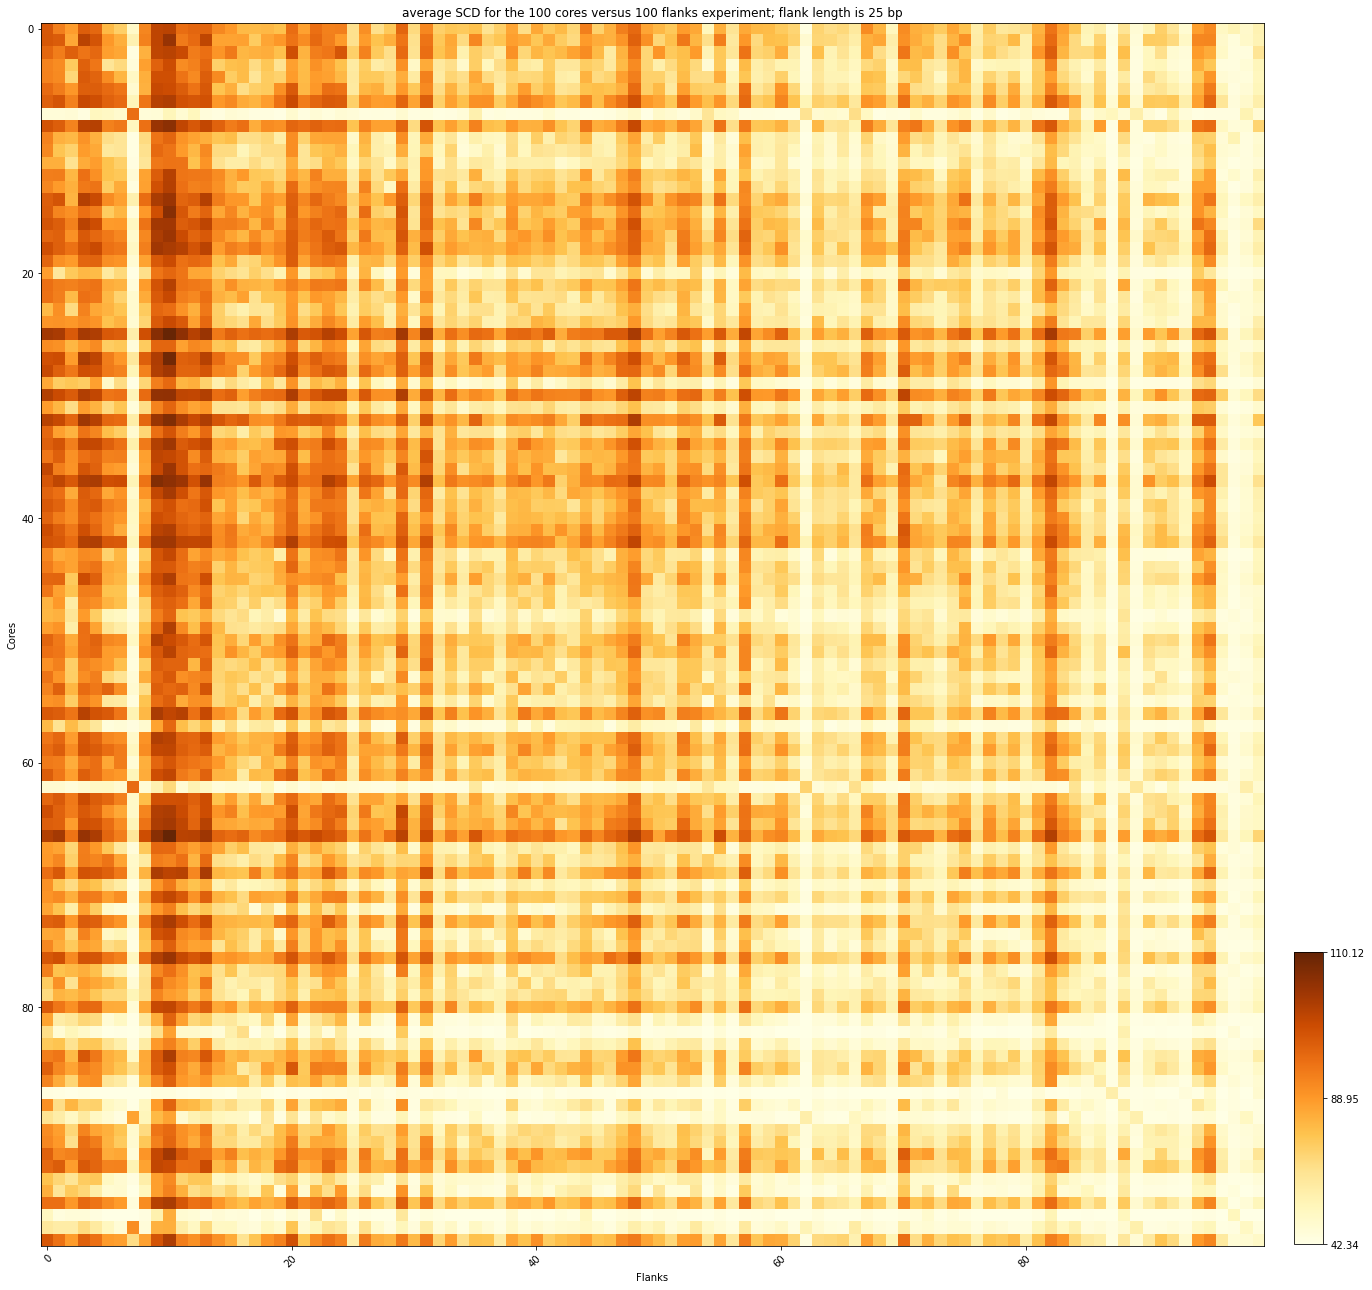

In [18]:
fig, ax = plt.subplots()
im = ax.imshow(summary_matrix, cmap="YlOrBr")

fig.set_figheight(22.5)
fig.set_figwidth(23)

ax.set_ylabel('Cores')
ax.set_xlabel('Flanks')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.set_title("average SCD for the 100 cores versus 100 flanks experiment; flank length is 25 bp")

cax = plt.axes([0.90, 0.126, 0.0175, 0.18])
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap="YlOrBr"), cax=cax, ticks=[0, 0.5, 1])

cbar.ax.set_yticklabels([str(round(np.min(summary_matrix),2)), 
                         str(round((np.max(summary_matrix) - np.min(summary_matrix)/2),2)), 
                         str(round(np.max(summary_matrix),2))])

# plt.savefig("100vs100strong_sorted_matplot.png")
plt.show()


# reordering rows and columns by biclustering

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list

In [20]:
all_starts = [f"motif {i}" for i in range(100)]

In [ ]:
# matrix ordered with respect to genomic SCD

In [21]:
summary_matrix = np.zeros((len(all_starts), (len(all_starts))))

In [22]:
# df.core_start.unique()

In [23]:
counter = 0

for core_start in df.core_start.unique():
    summary_matrix[counter] += df_grouped[df_grouped["core_start"] == core_start]["SCD_average"].values
    counter += 1

In [ ]:
# so now, the matrix is ordered from morif 0 to 99
# cores are on the y axis, flanks on the x axis

In [24]:
row_order = list(leaves_list(linkage(summary_matrix)))

In [ ]:
# row_order

In [25]:
column_order = list(leaves_list(linkage(np.transpose(summary_matrix))))

In [ ]:
# column_order

In [26]:
reordered_summary_matrix = np.zeros((len(all_starts), (len(all_starts))))

In [27]:
counter_row = 0

for core_idx in range(100):
    row_motif = row_order[core_idx]
    core_start = df.core_start.unique()[row_motif]

    for flank_idx in range(100):
        column_motif = column_order[flank_idx]
        flank_start = df.core_start.unique()[column_motif]

        reordered_summary_matrix[core_idx, flank_idx] += df_grouped[(df_grouped["core_start"] == core_start) & (df_grouped["flank_start"] == flank_start)]["SCD_average"].values

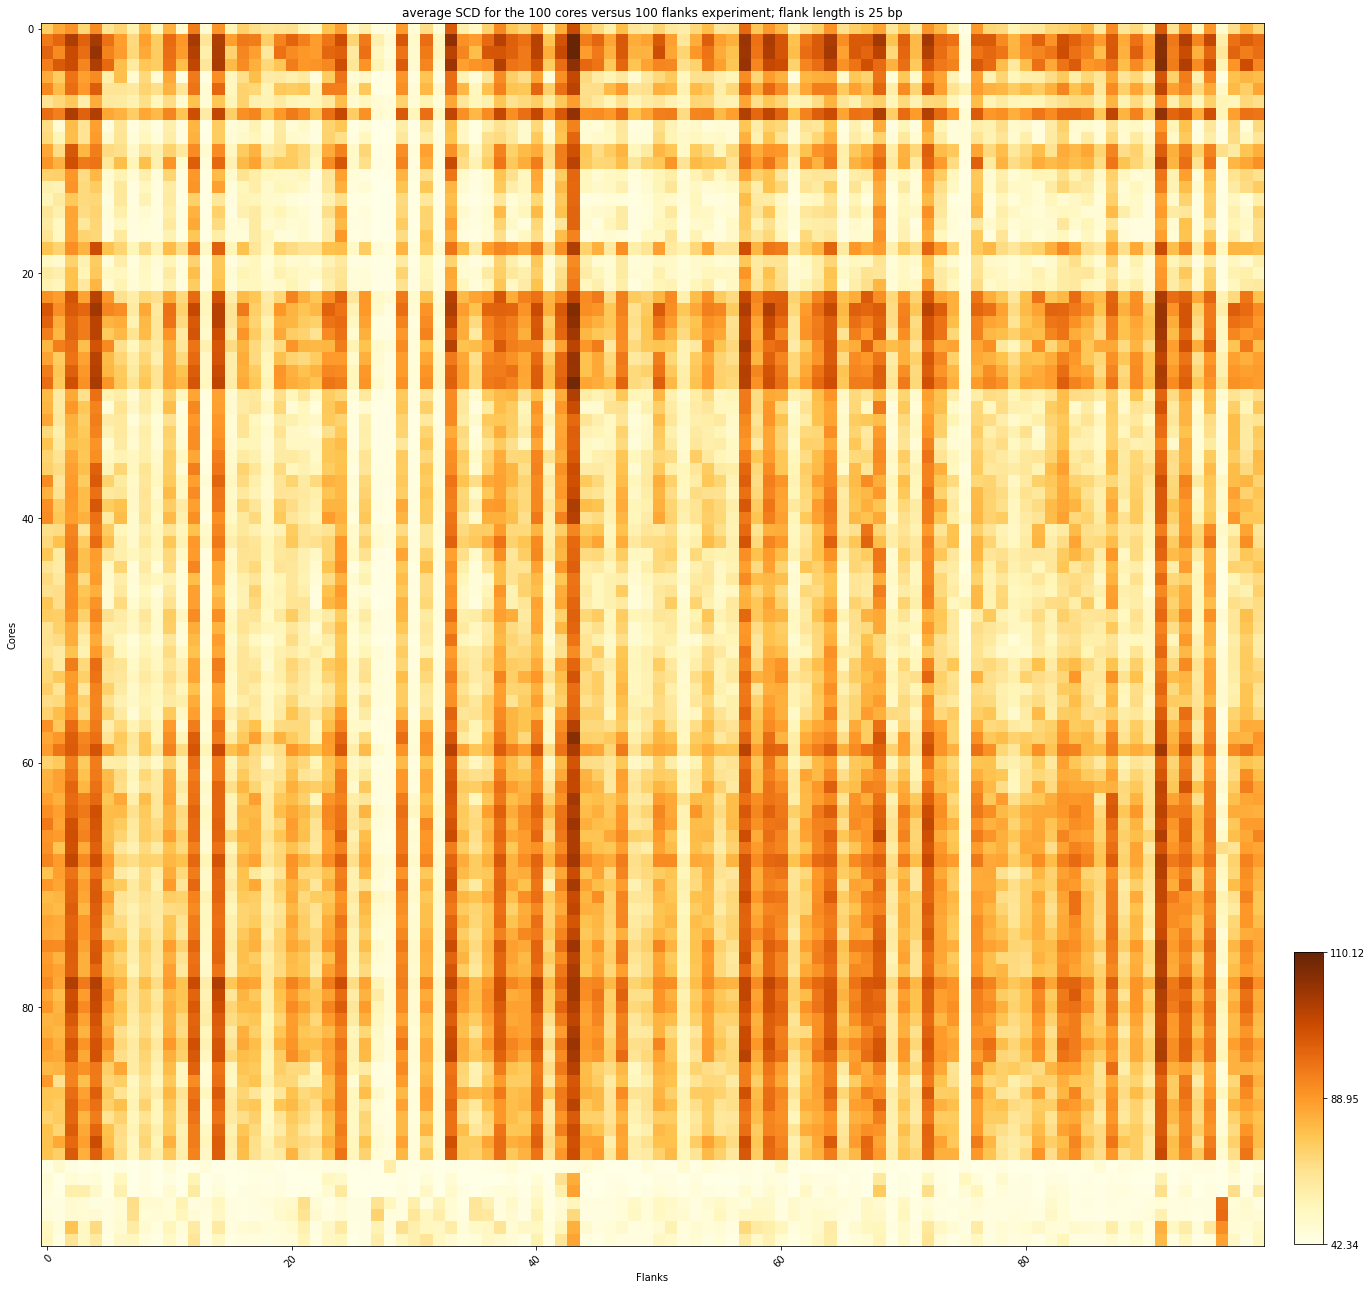

In [29]:
fig, ax = plt.subplots()
im = ax.imshow(reordered_summary_matrix, cmap="YlOrBr")

fig.set_figheight(22.5)
fig.set_figwidth(23)

ax.set_ylabel('Cores')
ax.set_xlabel('Flanks')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.set_title("average SCD for the 100 cores versus 100 flanks experiment; flank length is 25 bp")

cax = plt.axes([0.90, 0.126, 0.0175, 0.18])
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap="YlOrBr"), cax=cax, ticks=[0, 0.5, 1])

cbar.ax.set_yticklabels([str(round(np.min(reordered_summary_matrix),2)), 
                         str(round((np.max(reordered_summary_matrix) - np.min(reordered_summary_matrix)/2),2)), 
                         str(round(np.max(reordered_summary_matrix),2))])

# plt.savefig("100vs100strong_sorted-clustering_matplot.png")
plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=20, n_init=10, init='random').fit(summary_matrix)

In [ ]:
labels = list(kmeans.labels_)

In [ ]:
# labels

In [ ]:
# sorted_native_SCDs_descending_core_start

In [ ]:
d = {'start':sorted_native_SCDs_descending_core_start,'label':labels}

In [ ]:
sorted_starts = pd.DataFrame(d).sort_values(by="label").reset_index(drop=True) 

In [ ]:
sorted_starts = list(sorted_starts["start"].unique())

In [ ]:
second_summary_matrix = np.zeros((100, 100))

In [ ]:
core_start = "5905000"
flank_start = "5905000"

In [ ]:
df_grouped[(df_grouped["core_start"] == core_start) & (df_grouped["flank_start"] == flank_start)]["SCD_average"].values[0]

In [ ]:
counter_row = 0

for core_start in sorted_starts:
    counter_column = 0
    for flank_start in sorted_starts:
        second_summary_matrix[counter_row, counter_column] += df_grouped[(df_grouped["core_start"] == str(core_start)) & (df_grouped["flank_start"] == str(flank_start))]["SCD_average"].values
        counter_column += 1
    counter_row += 1

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(second_summary_matrix, cmap="YlOrBr")

fig.set_figheight(22.5)
fig.set_figwidth(23)

ax.set_ylabel('Cores')
ax.set_xlabel('Flanks')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.set_title("average SCD for the 100 cores versus 100 flanks experiment; flank length is 25 bp")

cax = plt.axes([0.90, 0.126, 0.0175, 0.18])
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap="YlOrBr"), cax=cax, ticks=[0, 0.5, 1])

cbar.ax.set_yticklabels([str(round(np.min(second_summary_matrix),2)), 
                         str(round((np.max(second_summary_matrix) - np.min(second_summary_matrix)/2),2)), 
                         str(round(np.max(second_summary_matrix),2))])

# plt.savefig("100vs100strong_sorted_matplot.png")
plt.show()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
pca.fit(summary_matrix)

In [ ]:
print(pca.explained_variance_ratio_)

In [ ]:
pca_values = pca.components_

In [ ]:
pca_values.shape

In [ ]:
plt.figure(figsize=(14,14))

x = pca_values[0,]
y = pca_values[1,]

plt.scatter(x, y)

for i in range(pca_values.shape[1]):
    plt.text(x[i]+0.001, y[i], all_names[i].split(' ')[1],horizontalalignment='left', color='black')

plt.xlabel("1st PC")
plt.ylabel("2nd PC")

# plt.savefig("100vs100_PCA.png")

plt.show()

In [ ]:
# average for each core
cores_ave = summary_matrix.mean(1)

In [ ]:
# average for each flank set
flanks_ave = summary_matrix.mean(0)

In [ ]:
# the more yellow, the higher value of the average SCD

In [ ]:
plt.figure(figsize=(14,14))

x = pca_values[0,]
y = pca_values[1,]

plt.scatter(x, y, c=cores_ave)

for i in range(pca_values.shape[1]):
    plt.text(x[i]+0.001, y[i], all_names[i].split(' ')[1],horizontalalignment='left', color='black')

plt.xlabel("1st PC")
plt.ylabel("2nd PC")

# plt.savefig("100vs100_PCA_ave_cores.png")

plt.show()

In [ ]:
plt.figure(figsize=(14,14))

x = pca_values[0,]
y = pca_values[1,]

plt.scatter(x, y, c=flanks_ave)

for i in range(pca_values.shape[1]):
    plt.text(x[i]+0.001, y[i], all_names[i].split(' ')[1],horizontalalignment='left', color='black')

plt.xlabel("1st PC")
plt.ylabel("2nd PC")

plt.savefig("100vs100_PCA_ave_flanks.png")

plt.show()